# Multiple dosing
Multiple dosing in drug therapy refers to the practice of administering multiple doses of a drug or medication over a specific period of time to maintain a constant or effective drug concentration within the body. This approach is often used for conditions that require a continuous level of drug presence in the system, or for drugs with a short half-life that need to be administered frequently to maintain their effect.

Here are the main aspects of multiple dosing:

1. **Steady-state Concentration**: Over time, multiple doses of a drug lead to a steady-state concentration in the blood. This steady-state is reached when the amount of drug entering the body equals the amount being removed (through metabolism and excretion). This usually happens after approximately 4-5 times the half-life of the drug.

2. **Dosing Interval**: The dosing interval is the time between two consecutive doses. It's typically designed based on the half-life of the drug. For most drugs, it's aimed at maintaining the drug concentration within the therapeutic window.

3. **Therapeutic Window**: This is the range of drug concentrations in the blood that provide effective treatment without causing toxicity. The goal of multiple dosing is to keep the drug concentration within this range.

4. **Dose and Frequency**: The size of the dose and frequency of dosing are critical in multiple dosing strategies. They must be determined with care to avoid toxic levels while still providing therapeutic benefit.

5. **Accumulation and Elimination**: When drugs are administered repeatedly, they can accumulate in the body, leading to higher concentrations than after the first dose. This must be considered when planning a multiple dosing regimen.

6. **Interindividual Variability**: There can be a significant difference in how different individuals respond to the same drug and dosage due to genetic factors, age, gender, organ function, and the presence of other diseases or drugs. This factor is crucial in customizing a multiple dosing regimen for each patient.

7. **Compliance**: Compliance with the dosing regimen is essential for the success of the treatment. The easier the regimen (for example, fewer doses per day), the higher the chance the patient will adhere to it.

In short, multiple dosing is a sophisticated process and is a crucial part of many drug therapies. It involves a careful balance of dose, frequency, and timing to ensure that the drug is as effective as possible while minimizing side effects and toxicity. To achieve this, healthcare providers often need to monitor drug levels in the blood and adjust doses based on patient response.

![Multiple Dosing](05_multiple_dosing.png)

## Multiple dosing example

We now run a multiple dosing protocol with our simple model.

![Absorption Elimination Model](04_simple_absorption.png)

In [16]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pylab as plt
import pandas as pd

def dxdt_absorption_first_order(x, t, ka, ke):
    """
    First order absorption model
    """
    # state variables
    A_tablet = x[0]  # [mg]
    A_central = x[1] # [mg/l]
    A_urine = x[2] # [mg]
    
    # rates
    va = ka * A_tablet  # [mg/hr]
    ve = ke * A_central # [mg/hr]

    # odes (stoichiometric equation)    
    return [
        -va,            # dA_tablet/dt  [mg/hr]
         va - ve,       # dA_central/dt [mg/hr]
         ve,            # dA_urine/dt  [mg/hr]
    ] 


def simulate_multi_dosing(Dose_A, ka, ke):
    """Helper function to run the multiple dosing simulation."""

    # initial condition
    names = ["A_tablet", "A_central", "A_urine"]
    x0 = [
        Dose_A,  # A_tablet  [mg]
        0.0,   # A_central [mg]
        0.0,   # A_urine [mg]
    ]

    # time span for single dose
    t = np.linspace(0, 24, num=100) # [hr]

    # multiple dose simulation
    n_doses = 20  # [hr]
    
    dfs = []
    for k in range(n_doses):
        if k == 0:
            x0[0] = 400
            tvec = t.copy()
        elif k > 0:
            x0 = x[-1, :]
            x0[0] = x0[0] + Dose_A
            tvec = t.copy() + tvec[-1]

        x = odeint(dxdt_absorption_first_order, x0, tvec, args=(ka, ke))
        df = pd.DataFrame(x, columns=names)
        df["time"] = tvec
        dfs.append(df)

    df_all = pd.concat(dfs)
    return df_all

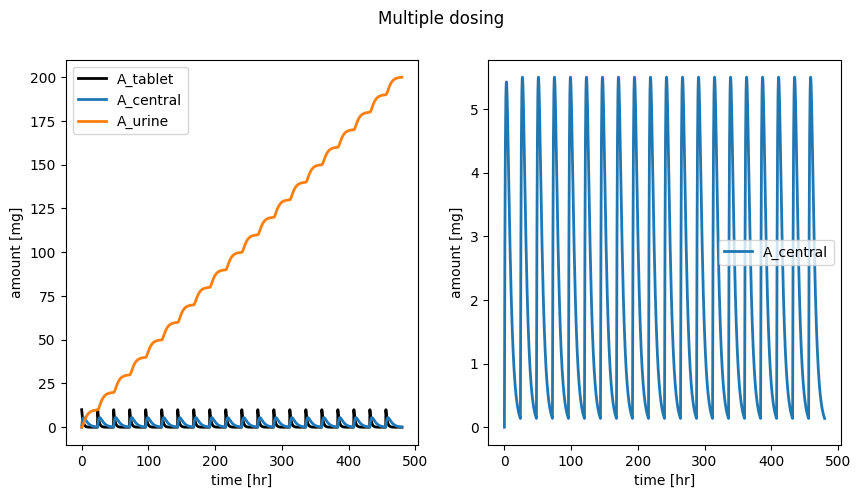

In [9]:
# run simulation and plot results
Dose_A = 10.0  # [mg]
ka = 0.5  # [1/hr]
ke = 0.2  # [1/hr]
df = simulate_multi_dosing(Dose_A, ka, ke)

colors = ["black", "tab:blue", "tab:orange"]
names = ["A_tablet", "A_central", "A_urine"]
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
f.suptitle("Multiple dosing")
# all species
for k, name in enumerate(names):
    ax1.plot(df.time, df[name], linewidth=2, label=name, color=colors[k])

# only A_central
ax2.plot(df.time, df["A_central"], linewidth=2, label=names[1], color=colors[1])

for ax in (ax1, ax2):

    ax.legend()
    ax.set_xlabel("time [hr]")
    ax.set_ylabel("amount [mg]")

plt.show()

**Exercise**: How do you have to change kel or ka to observe dose accumulation in the central compartment? Change these parameters and see what the effect is.

Does the Dose `Dose_A` play a role?

# Therapheutic window

The **therapeutic window**, also known as the **therapeutic range** or **therapeutic index**, is a crucial concept in pharmacology and drug therapy. It is the range of drug dosages which can treat disease effectively while staying within the safety limits to avoid toxicity and side effects.

The therapeutic window is determined by two main factors: **the minimum effective concentration (MEC)** and the **maximum tolerable concentration (MTC)**.

* The **minimum effective concentration (MEC)** is the lowest concentration of a drug in the patient's bloodstream that still produces the desired therapeutic effect. If the concentration falls below this level, the drug may not be effective in treating the condition, leading to ineffective therapy.

* The **maximum tolerable concentration (MTC)** is the highest concentration of a drug that can be tolerated without causing significant toxic effects or side effects. If the drug concentration exceeds this level, the risk of side effects and toxicity increases.

The therapeutic window lies between these two concentrations. The goal in drug therapy is to maintain the drug concentration within this window: high enough to be effective (above the MEC) but low enough to be safe (below the MTC).

This balance is particularly important with drugs that have a narrow therapeutic window, meaning the difference between the effective dose and the toxic dose is small. For these drugs, small changes in the drug concentration can lead to either therapeutic failure or toxicity.

Monitoring drug levels in the body is often required for these drugs, and dosages may need to be adjusted based on individual patient response, metabolism, and excretion rates. This is especially relevant in multiple dosing regimens where the aim is to maintain a steady-state concentration of the drug within the therapeutic window.

In summary, the therapeutic window is critical in drug therapy. It provides a guideline for effective and safe drug dosages. Staying within this window helps to achieve the therapeutic benefits of the drug while minimizing the risk of side effects and toxicity.

We add the **MEC** and **MTC** lines to see if we can achieve the therapeutic range.

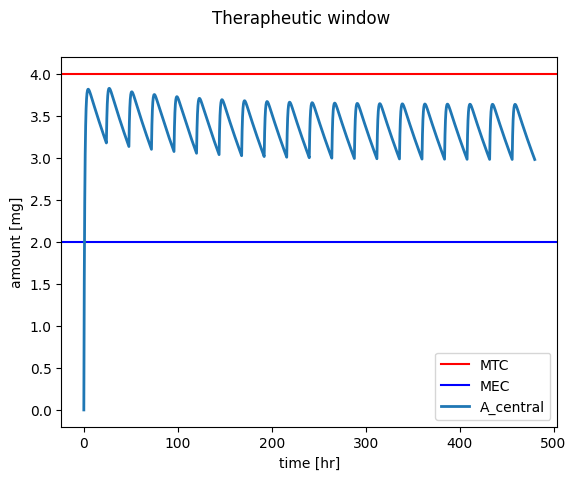

In [17]:
# plot results

# run simulation and plot results
Dose_A = 80.0  # [mg]
ka = 0.01  # [1/hr]
ke = 1.0  # [1/hr]
df = simulate_multi_dosing(Dose_A, ka, ke)

f, ax = plt.subplots(nrows=1, ncols=1)
f.suptitle("Therapheutic window")

ax.axhline(y=4, color='r', linestyle='-', label="MTC")
ax.axhline(y=2, color='b', linestyle='-', label="MEC")

ax.plot(df.time, df["A_central"], linewidth=2, label=names[1], color=colors[1])
ax.legend()
ax.set_xlabel("time [hr]")
ax.set_ylabel("amount [mg]")

plt.show()

**Exercise**: Change the dosing regime via `ka`, `ke` and `Dose_A` so that the concentrations are in the therapheutic window. See what is the effect of different combinations of these parameters.